In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datagenerator import DataGenerator
import matplotlib.pyplot as plt
import numpy as np


/var/folders/ym/d61c4fn95wnc49fhqpl3s4480000gn/T/ipykernel_53511/1678674856.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


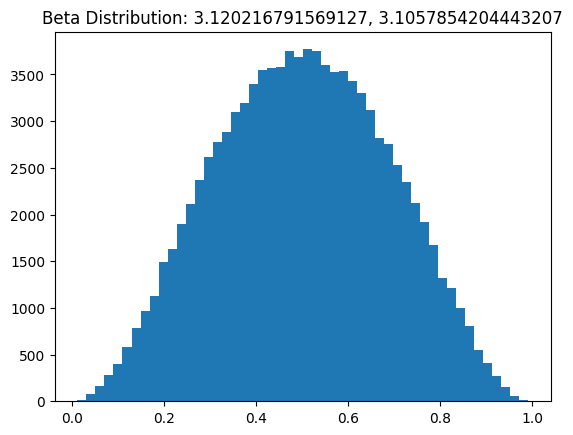

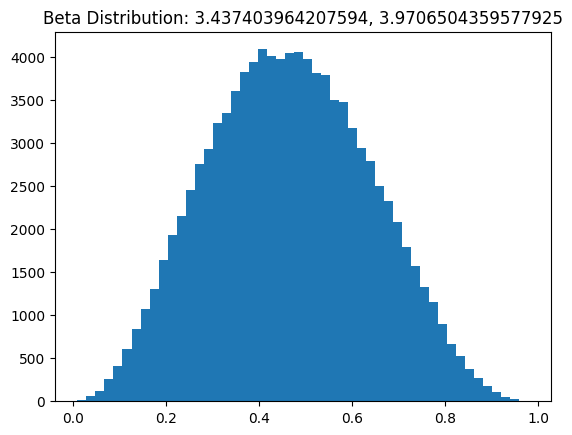

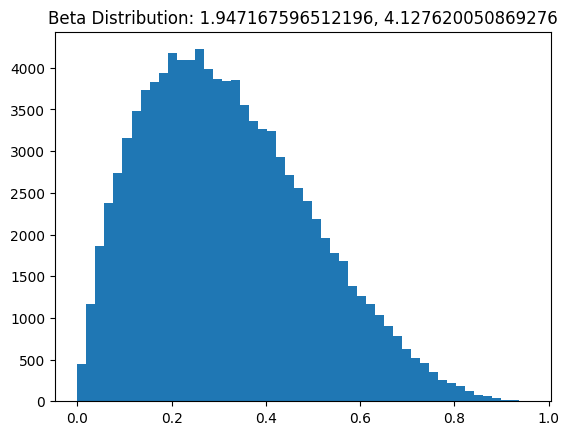

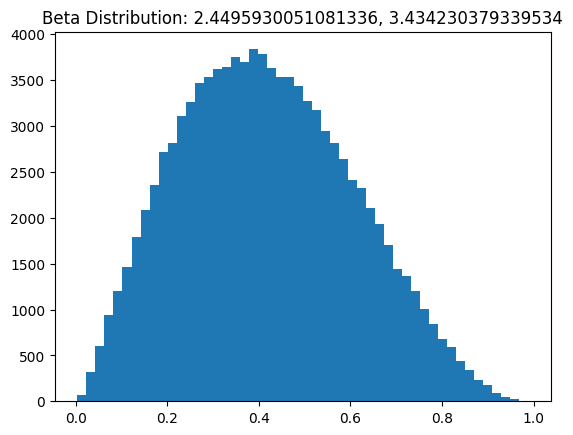

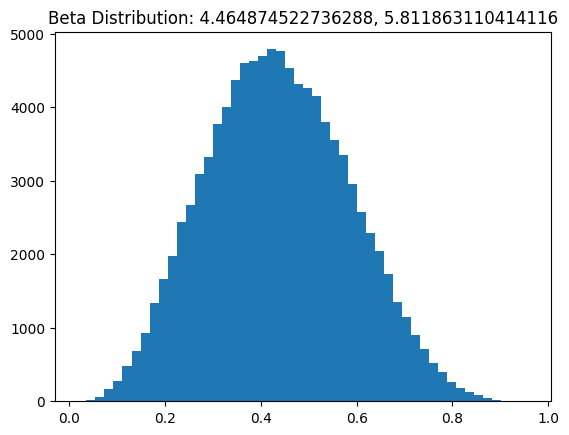

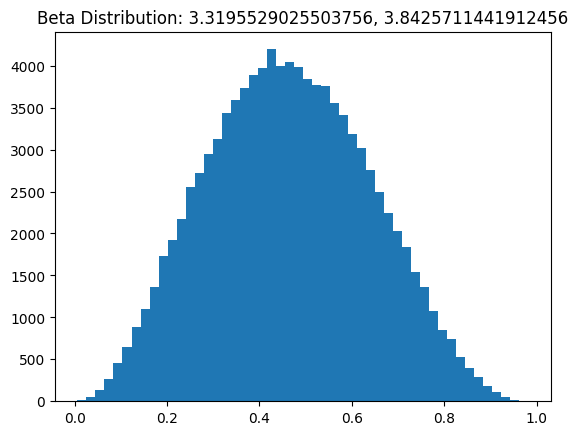

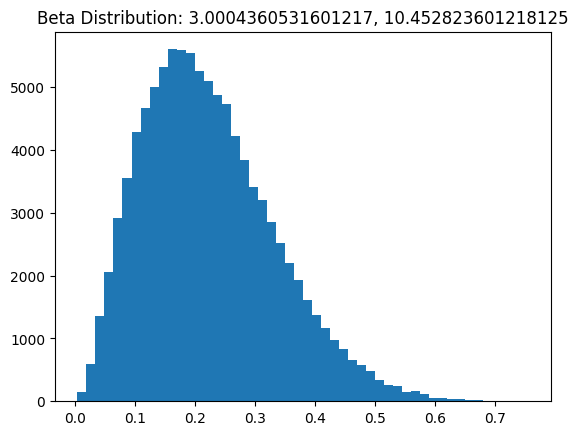

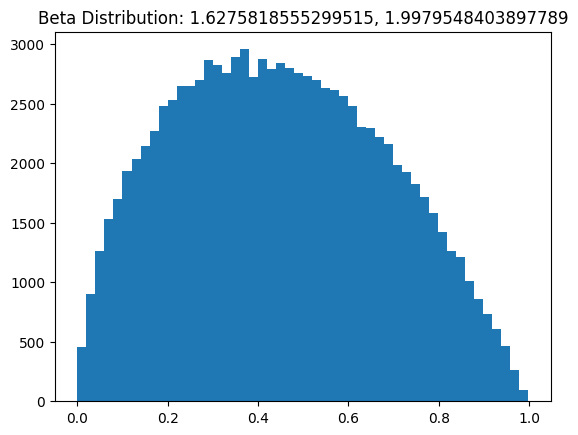

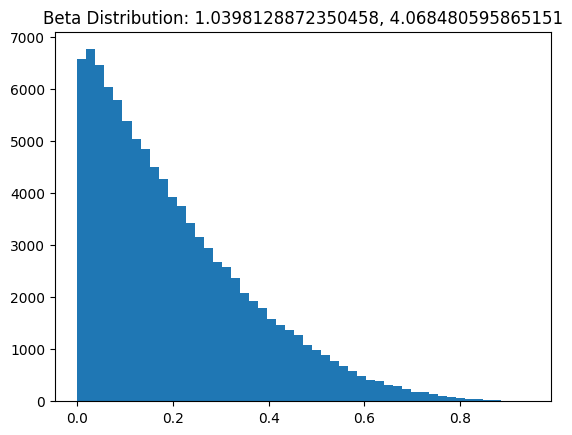

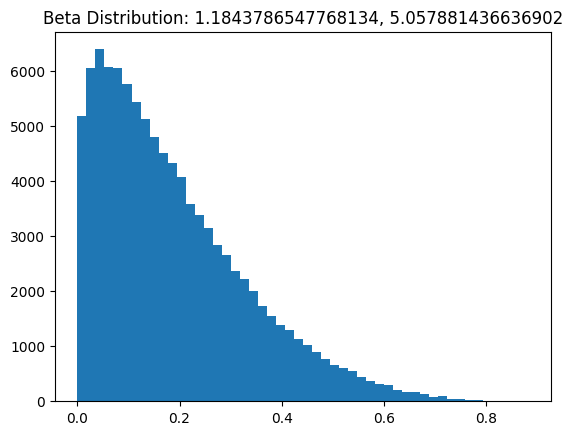

In [2]:
import numpy as np
import matplotlib.pyplot as plt

size = 100000  # Number of samples

def beta_distribution(size, a, b):
    # distribution = np.random.power(alpha, size)
    distribution  = np.random.beta(a, b, size)
    return distribution

def reset_feature_params(n_features):
    feature_dist_params = {}
    for i in range(n_features):
        a = np.random.uniform(1.0, 5.0)
        if np.random.rand() > 0.5:
            b = a/np.random.uniform(0.5, 2.0)
        else:
            b = a * np.random.uniform(2.0, 5.0)

        feature_dist_params[f'a{i}'] = a
        feature_dist_params[f'b{i}'] = b

    return feature_dist_params

        
feature_dist_params = reset_feature_params(10) 

for i in range(10):
    a, b = feature_dist_params[f'a{i}'], feature_dist_params[f'b{i}']
    dist1 = beta_distribution(size, a, b)

    # Plot the distribution
    plt.hist(dist1, bins=50)
    plt.title(f'Beta Distribution: {a}, {b}')
    plt.show()


Model Coefficients: [ 48.97847972 168.44737672 193.17933848 149.77654784]
Model Intercept: 22.41098482177253
Root Mean Squared Error (RMSE): 14.841321543694738
R^2 Score: 0.8641565545970009


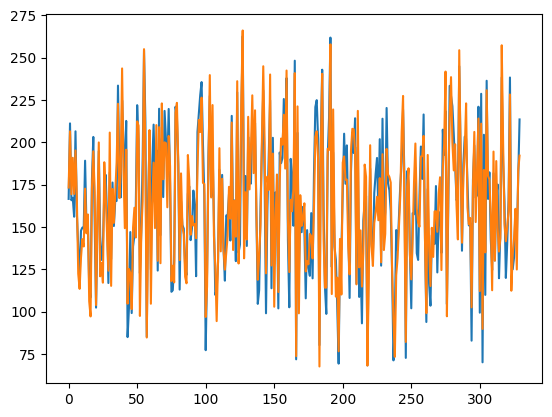

In [4]:
dg = DataGenerator(n_features=4)
df = dg.generate_data(1000)

x = df[['x0', 'x1', 'x2', 'x3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Root Mean Squared Error (RMSE): {np.power(mse, 0.5)}")
print(f"R^2 Score: {r2}")

plt.plot(y_test.values)
plt.plot(y_pred)
plt.show()

### Serialise model

In [5]:
from joblib import dump, load

# Assume 'pipeline' is your trained pipeline
# Save the pipeline to a file
dump(model, 'model.joblib')

['model.joblib']

Model Coefficients: [ 48.97847972 168.44737672 193.17933848 149.77654784]
Model Intercept: 22.41098482177253
Root Mean Squared Error (RMSE): 36.084680298144654
R^2 Score: 0.09735638099072086


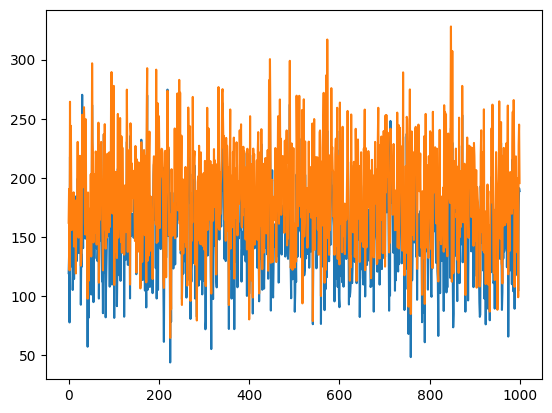

In [8]:
loaded_pipeline = load('model.joblib')

N_OBS = 200
N_FEATURES = 4

dg.reset_feature_params()
df = dg.generate_data(1000)

x_new = df[['x0', 'x1', 'x2', 'x3']]
y_new = df['y']

# Predict the target variable for the testing set
y_pred = model.predict(x_new)

# Evaluate the model
mse = mean_squared_error(y_new, y_pred)
r2 = r2_score(y_new, y_pred)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Root Mean Squared Error (RMSE): {np.power(mse, 0.5)}")
print(f"R^2 Score: {r2}")

plt.plot(y_new)
plt.plot(y_pred)
plt.show()